In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv',delimiter=',',encoding='latin-1')
df = df[['Category','Message']]
df = df[pd.notnull(df['Message'])]
df.rename(columns = {'Message':'Message'}, inplace = True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.index = range(5572)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

87265

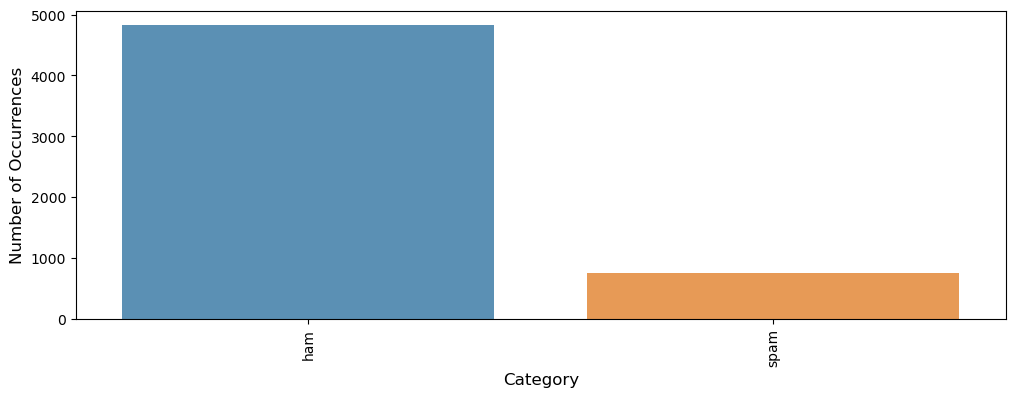

In [9]:
cnt_pro = df['Category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x= cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [10]:


def print_message(index):
    example = df[df.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)



URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Message: spam


In [11]:
print_message(0)
print_message(12)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Message: ham
URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Message: spam


In [12]:


#Text Preprocessing Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)



/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_67298/789792783.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [14]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.5 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [16]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
#import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_67298/789792783.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
[nltk_data] Downloading package punkt to /Users/zaarr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Found 5572 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5572, 50)


In [49]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['and', 'also', 'i', "'ve", 'sorta', 'blown', 'him', 'off', 'a', 'couple', 'times', 'recently', 'so', 'id', 'rather', 'not', 'tet', 'him', 'out', 'of', 'the', 'blue', 'looking', 'for', 'weed'], tags=['ham']),
       TaggedDocument(words=['mmm', 'thats', 'better', 'now', 'i', 'got', 'a', 'roast', 'down', 'me', '!', 'iâ\x92d', 'b', 'better', 'if', 'i', 'had', 'a', 'few', 'drinks', 'down', 'me', '2', '!', 'good', 'indian', '?'], tags=['ham']),
       TaggedDocument(words=['mm', 'have', 'some', 'kanji', 'dont', 'eat', 'anything', 'heavy', 'ok'], tags=['ham']),
       ...,
       TaggedDocument(words=['prabha', '..', 'i', "'m", 'soryda', '..', 'realy', '..', 'frm', 'heart', 'i', "'m", 'sory'], tags=['ham']),
       TaggedDocument(words=['nt', 'joking', 'seriously', 'i', 'told'], tags=['ham']),
       TaggedDocument(words=['did', 'he', 'just', 'say', 'somebody', 'is', 'named', 'tampa'], tags=['ham'])],
      dtype=object)

In [50]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████| 5571/5571 [00:00<00:00, 1239600.40it/s]


In [51]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████████████████████████████| 5571/5571 [00:00<00:00, 4946330.99it/s]


CPU times: user 5.77 s, sys: 48.6 ms, total: 5.82 s
Wall time: 5.8 s


In [52]:
print(d2v_model)
# Assuming you want to access the vector for document with index 0
doc_vector = d2v_model.dv[1]
print(doc_vector)


Doc2Vec<dm/m,d20,n5,w8,s0.001>
[ -4.71761      2.4872806   -9.748787     2.9440424    7.0818686
  -7.771412    -3.397117    -7.0657225   -3.589105     0.22655676
   7.8616014    5.9744163   -2.5169072   -0.5701806    1.9913062
   0.9375581   -2.7988002  -12.875649    -1.8085363   -2.4935687 ]


In [53]:
#len(d2v_model.wv)
#len(d2v_model.wv.vocab)
num_document_vectors = len(d2v_model.dv)
print(num_document_vectors)


2


In [54]:
num_document_vectors = len(d2v_model.dv)
print(num_document_vectors)

2


In [55]:
vocab_size = len(d2v_model.wv.key_to_index)
print(vocab_size)


9361


In [56]:
num_documents = d2v_model.corpus_count
print(num_documents)


5571


In [57]:


# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.vectors):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
          embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])



/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_67298/1677535227.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  for i, vec in enumerate(d2v_model.docvecs.vectors):


In [58]:
#d2v_model.wv.most_similar(positive=['urgent'], topn=10)
# Assuming 'urgent' is a word you want to find similar documents for
word_vector = d2v_model.wv['hmm']
similar_documents = d2v_model.dv.most_similar([word_vector], topn=10)
print(similar_documents)


[('ham', 0.5191678404808044), ('spam', -0.12146803736686707)]


In [59]:
d2v_model.wv.most_similar(positive=['urgent'], topn=10)


[('feellikw', 0.7615731954574585),
 ('09061749602', 0.7304093241691589),
 ('reserve', 0.7188398241996765),
 ('pee', 0.7069921493530273),
 ('shit.justfound', 0.6999915838241577),
 ('09058094565', 0.6995113492012024),
 ('regret', 0.6954028606414795),
 ('uawake', 0.6947064995765686),
 ('beneficiary', 0.6944810152053833),
 ('craigslist', 0.6888985633850098)]

In [60]:
d2v_model.wv.most_similar(positive=['cherish'], topn=10)

[('enjoyed', 0.8829786777496338),
 ('wishing', 0.7337071895599365),
 ('mojibiola', 0.730329692363739),
 ('mwahs', 0.7182087898254395),
 ('burial', 0.7087436318397522),
 ('missed', 0.7073675990104675),
 ('attracts', 0.7032373547554016),
 ('aretaking', 0.7020084857940674),
 ('practising', 0.6997680068016052),
 ('regret', 0.6982877254486084)]

In [61]:
d2v_model.wv.most_similar(positive=['hot'], topn=10)

[('gay', 0.739388108253479),
 ('â£1.50p', 0.7275198698043823),
 ('w8in', 0.6855700612068176),
 ('secs', 0.6839038133621216),
 ('02073162414', 0.6711332201957703),
 ('relocate', 0.6706814169883728),
 ('4utt', 0.6668498516082764),
 ('dirty', 0.6665506362915039),
 ('cleaning', 0.6620139479637146),
 ('bedreal', 0.6552912592887878)]

In [62]:
d2v_model.wv.most_similar(positive=['enjoy'], topn=10)

[('whats', 0.692950427532196),
 ('ecept', 0.6461871862411499),
 ('deduct', 0.6231467723846436),
 ('sighs', 0.6195566654205322),
 ('sender', 0.6124569177627563),
 ('put', 0.6078450083732605),
 ('tv/', 0.5963074564933777),
 ('billing', 0.5915576815605164),
 ('net', 0.5867791175842285),
 ('unconsciously', 0.5847325921058655)]

In [63]:
d2v_model.wv.most_similar(positive=['congrats'], topn=10)

[('0796.', 0.7959805727005005),
 ('0789.', 0.7671586871147156),
 ('relieved', 0.7529219388961792),
 ('ru', 0.734414279460907),
 ('reply.be', 0.7131716012954712),
 ('heâ\x92s', 0.6947227716445923),
 ('videophones', 0.6941127777099609),
 ('resolution', 0.6904767751693726),
 ('student', 0.6793217062950134),
 ('interview', 0.6788327693939209)]

In [65]:
#Create the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(2,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            187240    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 201,542
Trainable params: 201,542
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [71]:
Y = pd.get_dummies(df['Category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4736, 50) (4736, 2)
(836, 50) (836, 2)


In [72]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
148/148 - 3s - loss: 0.2892 - acc: 0.9109 - 3s/epoch - 17ms/step
Epoch 2/50
148/148 - 2s - loss: 0.0576 - acc: 0.9867 - 2s/epoch - 10ms/step
Epoch 3/50
148/148 - 2s - loss: 0.0239 - acc: 0.9949 - 2s/epoch - 10ms/step
Epoch 4/50
148/148 - 2s - loss: 0.0149 - acc: 0.9973 - 2s/epoch - 11ms/step
Epoch 5/50
148/148 - 2s - loss: 0.0073 - acc: 0.9981 - 2s/epoch - 11ms/step
Epoch 6/50
148/148 - 2s - loss: 0.0054 - acc: 0.9989 - 2s/epoch - 10ms/step
Epoch 7/50
148/148 - 2s - loss: 0.0037 - acc: 0.9989 - 2s/epoch - 10ms/step
Epoch 8/50
148/148 - 2s - loss: 0.0019 - acc: 0.9994 - 2s/epoch - 10ms/step
Epoch 9/50
148/148 - 2s - loss: 0.0012 - acc: 0.9996 - 2s/epoch - 10ms/step
Epoch 10/50
148/148 - 2s - loss: 8.5834e-04 - acc: 0.9996 - 2s/epoch - 10ms/step
Epoch 11/50
148/148 - 2s - loss: 6.2585e-04 - acc: 0.9998 - 2s/epoch - 10ms/step
Epoch 12/50
148/148 - 2s - loss: 4.7600e-04 - acc: 1.0000 - 2s/epoch - 10ms/step
Epoch 13/50
148/148 - 2s - loss: 3.9832e-04 - acc: 1.0000 - 2s/epoch - 10

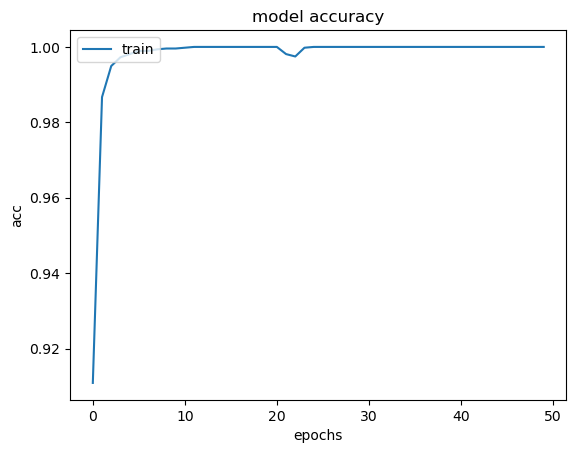

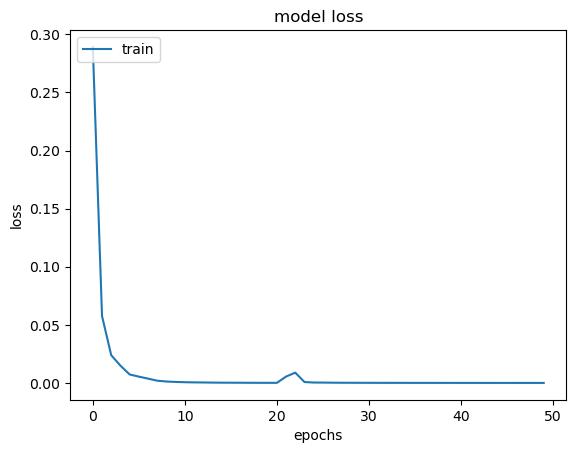

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [74]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

148/148 - 1s - loss: 1.0920e-05 - acc: 1.0000 - 829ms/epoch - 6ms/step
27/27 - 0s - loss: 0.0912 - acc: 0.9904 - 351ms/epoch - 13ms/step
Train: 1.000, Test: 0.9904


In [82]:


# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_classes =np.argmax(yhat_probs, axis=1)
print(yhat_classes)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1



import numpy as np

[[1.0000000e+00 1.4239743e-13]
 [1.0000000e+00 6.0482908e-12]
 [1.0000000e+00 1.8714299e-12]
 ...
 [1.0000000e+00 5.1295719e-13]
 [1.0000000e+00 1.8166558e-13]
 [1.0000000e+00 5.2738765e-11]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0

In [78]:
# Assuming model is your Sequential model
predictions = model.predict(X_test)  # Replace input_data with your data
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)

27/27 [==============================] - 0s 4ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 

In [83]:


import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [84]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm



array([[727,   2],
       [  6, 101]])

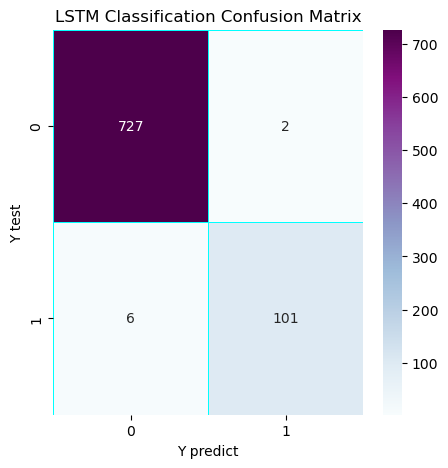

In [85]:


# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()



In [86]:


validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))



20/20 [==============================] - 0s 4ms/step - loss: 0.1169 - acc: 0.9890
score: 0.12
acc: 0.99


In [87]:
model.save('Mymodel.h5')

In [88]:


message = ['Congratulations! you have won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])



1/1 [==============================] - 0s 23ms/step
[[1.2103091e-08 1.0000000e+00]] spam


In [89]:
message = ['thanks for accepting my request to connect']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 24ms/step
[[1.00000e+00 9.18021e-12]] ham
